<a href="https://colab.research.google.com/github/Rahulpoddar477/Multi-Label-Image-Classification-on-Movies-Poster-Genre/blob/main/Multi_Label_Image_Classification_on_Movies_Poster_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Label Image Classification on Movies Poster Genre

In [ ]:
# Importing necessary library

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Movies-Poster_Dataset to local VM
!cp -r drive/My\ Drive/Movies-Poster_Dataset.zip .

In [ ]:
# Unzipping dataset
!unzip Movies-Poster_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Movies-Poster_Dataset/Images/tt0127247.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0127349.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0127536.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0127722.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0127723.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0128239.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0128278.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0128442.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0128445.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0128853.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0129167.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0129280.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0129290.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0129332.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0129387.jpg  
  inflating: Movies-Poster_Dataset/Images/tt0130018.jpg  
  inflating: Movies-P

In [ ]:
# Reading into panda dataframe
data = pd.read_csv('Movies-Poster_Dataset/train.csv')

##Feature Engineering

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Coverting image into array
X = []
for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(200, 200, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:23<00:00, 310.10it/s]


In [ ]:
X.shape

(7254, 200, 200, 3)

In [ ]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

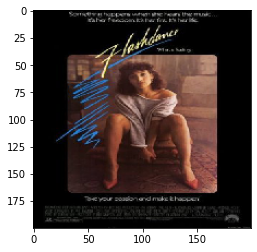

In [ ]:
# View data image
plt.imshow(X[1])

In [ ]:
# Splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [ ]:
#Building Model
model =  Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      1

##Training of model

In [ ]:
# Model compilation and training
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train,batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
97/97 [==============================] - 1839s 19s/step - loss: 0.6705 - binary_accuracy: 0.6706 - val_loss: 0.9396 - val_binary_accuracy: 0.6375
Epoch 2/15
97/97 [==============================] - 1845s 19s/step - loss: 0.3477 - binary_accuracy: 0.9016 - val_loss: 0.4937 - val_binary_accuracy: 0.8282
Epoch 3/15
97/97 [==============================] - 1843s 19s/step - loss: 0.2626 - binary_accuracy: 0.9102 - val_loss: 0.2928 - val_binary_accuracy: 0.8990
Epoch 4/15
97/97 [==============================] - 1835s 19s/step - loss: 0.2901 - binary_accuracy: 0.8968 - val_loss: 0.3010 - val_binary_accuracy: 0.9053
Epoch 5/15
97/97 [==============================] - 1842s 19s/step - loss: 0.2757 - binary_accuracy: 0.9029 - val_loss: 0.2411 - val_binary_accuracy: 0.9127
Epoch 6/15
97/97 [==============================] - 1855s 19s/step - loss: 0.2604 - binary_accuracy: 0.9081 - val_loss: 0.2422 - val_binary_accuracy: 0.9117
Epoch 7/15
97/97 [==============================] - 1864s 

##Plot training & validation accuracy

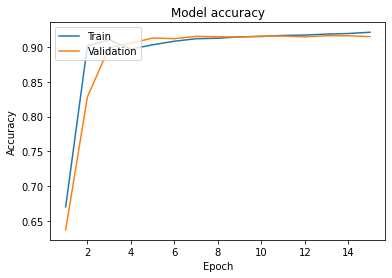

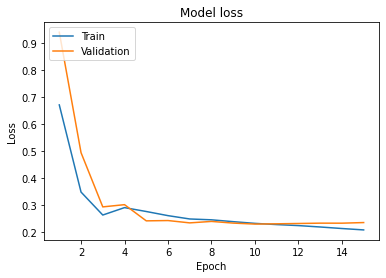

In [ ]:
# Plot training & validation accuracy values
epoch_range = range(1, 16)
plt.plot(epoch_range, history.history['binary_accuracy'])
plt.plot(epoch_range, history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Model Evaluation

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

35/35 - 71s - loss: 0.2348 - binary_accuracy: 0.9147


##Prediction

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
classes = data.columns[2:]

Type test image number12
[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.09206283 0.17384213 0.01098692 0.11805794 0.19509944 0.04817614
 0.3663747  0.5844757  0.06809554 0.08214417 0.03688404 0.05339178
 0.02581051 0.00424421 0.12757334 0.00216678 0.00158614 0.00109237
 0.11845365 0.02541202 0.00897074 0.04576817 0.07841846 0.07016701
 0.00887012]
The actual genres are:
[['Comedy']
 ['Crime']
 ['Drama']]
The predicted genres are:
Index(['Comedy', 'Documentary', 'Drama'], dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


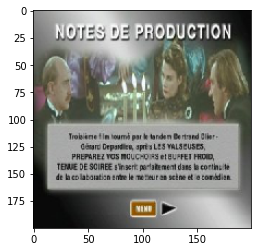

In [ ]:
# Prediction on single image
test_image = int(input('Type test image number'))
plt.imshow(X_test[test_image])
print(y_test[test_image])
print(y_pred[test_image])
print('The actual genres are:')
print(classes[np.argwhere(y_test[test_image])])
t=len(np.argwhere(y_test[test_image]))
print('The predicted genres are:')
print(classes[np.argsort(y_pred[test_image])[-t:]])